### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM e a biblioteca matplotlib:

**a)** Faça um gráfico de dispersão (scatter plot) de tamanho (10,5), com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" na cor azul e com uma letra diferente da usual.

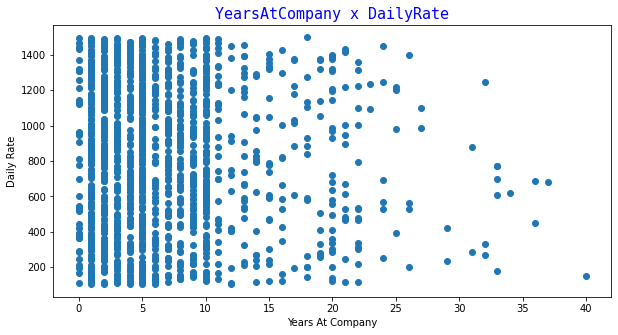

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1)
ax.set_title('YearsAtCompany x DailyRate', fontname='monospace', size=15, color='blue')

ax.set_xlabel('Years At Company')
ax.set_ylabel('Daily Rate')
plt.show()

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

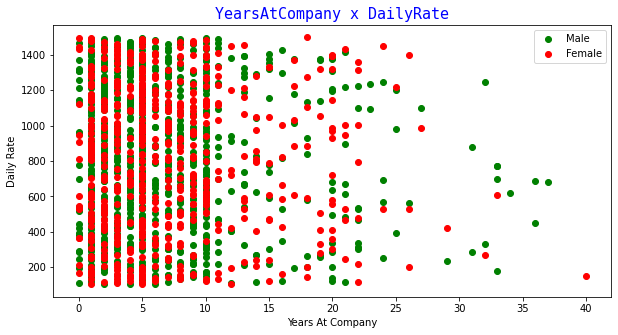

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
male = df1[df1['Gender']=='Male'].copy()
female = df1[df1['Gender']=='Female'].copy()

ax.scatter(x='YearsAtCompany', y='DailyRate', data=male, c='green', label='Male')
ax.scatter(x='YearsAtCompany', y='DailyRate', data=female, c='red', label='Female')

ax.legend()
ax.set_title('YearsAtCompany x DailyRate', fontname='monospace', size=15, color='blue')
ax.set_xlabel('Years At Company')
ax.set_ylabel('Daily Rate')
plt.show()

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

In [48]:
dict_js = {1: ['Low', '#FFE4E1'],
            2: ['Medium', '#FFB6C1'],
            3: ['High', '#FF69B4'],
            4: ['Very High', '#C71585']}

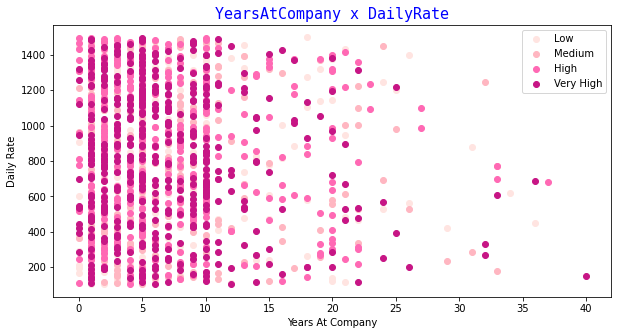

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

for i in dict_js:
    ax.scatter(x='YearsAtCompany', y='DailyRate', data=df1[df1['JobSatisfaction'] == i],
                   color=dict_js[i][1], label=dict_js[i][0])
 
ax.legend()
ax.set_title('YearsAtCompany x DailyRate', fontname='monospace', size=15, color='blue')
ax.set_xlabel('Years At Company')
ax.set_ylabel('Daily Rate')
plt.show()

## Exercício 2:

**a)** Utilizando a base de dados de covid e a biblioteca matplotlib, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

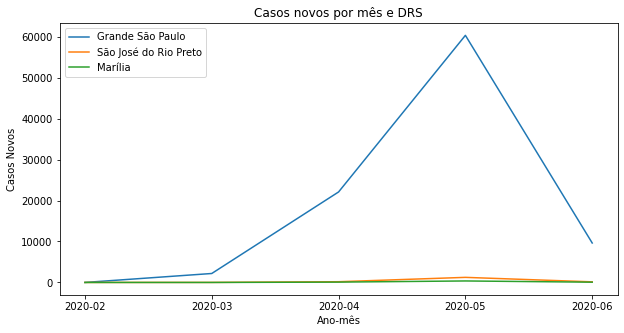

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
df_aux = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()
for drs in ['Grande São Paulo', 'São José do Rio Preto', 'Marília']:
    ax.plot('ano_mes' , 'casos_novos' ,data=df_aux[df_aux['nome_drs']==drs], label=drs)

    ax.legend()
ax.set_title('Casos novos por mês e DRS')
ax.set_xlabel('Ano-mês')
ax.set_ylabel('Casos Novos')

plt.show()

**b)** Repita o gráfico do item a trocando as cores dos DRS.

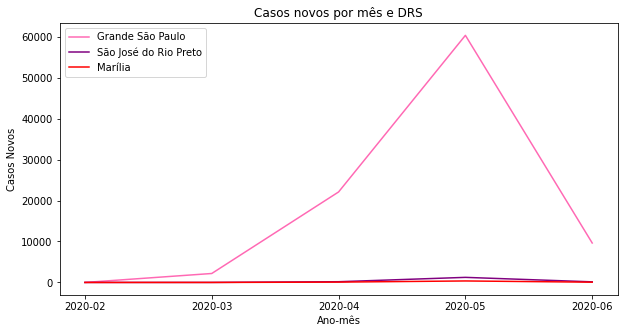

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
df_aux = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()

dict_color={'Grande São Paulo' : 'hotpink', 
            'São José do Rio Preto' : 'purple', 
            'Marília' : 'red'}

for drs in ['Grande São Paulo', 'São José do Rio Preto', 'Marília']:
    ax.plot('ano_mes' , 'casos_novos' ,data=df_aux[df_aux['nome_drs']==drs], label=drs, color=dict_color[drs])

ax.legend()
ax.set_title('Casos novos por mês e DRS')
ax.set_xlabel('Ano-mês')
ax.set_ylabel('Casos Novos')

plt.show()

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

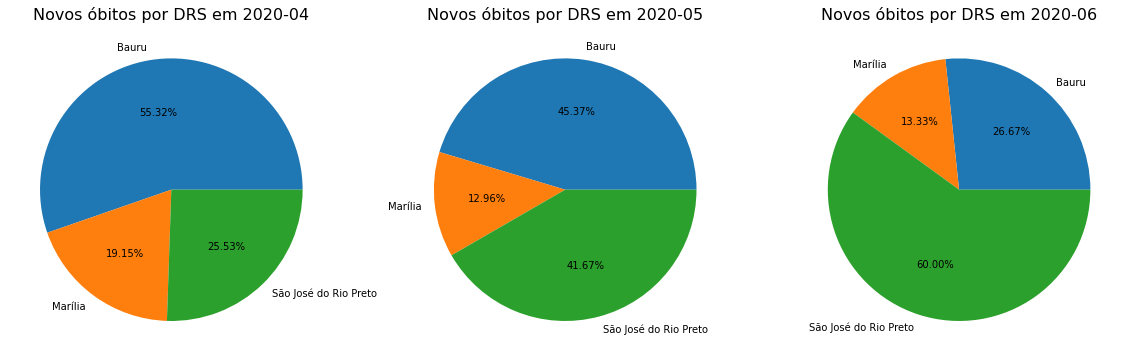

In [66]:
## Um gráfico de vendas por cada mês
fig, ax = plt.subplots(1,3, figsize=(20,15))
for i, mes in enumerate(['2020-04', '2020-05', '2020-06']):
    df_aux = df2[(df2['ano_mes']==mes) & df2['nome_drs'].isin(['Bauru', 'São José do Rio Preto', 'Marília'])].copy()
    ax[i].pie(x='obitos_novos', data=df_aux.groupby(['nome_drs'],as_index=False).sum(), labels='nome_drs', autopct='%.2f%%')
    ax[i].set_title(f'Novos óbitos por DRS em {mes}', size=16)
plt.show()

## Exercício 3:
Utilizando a base de dados de covid e a biblioteca matplotlib:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

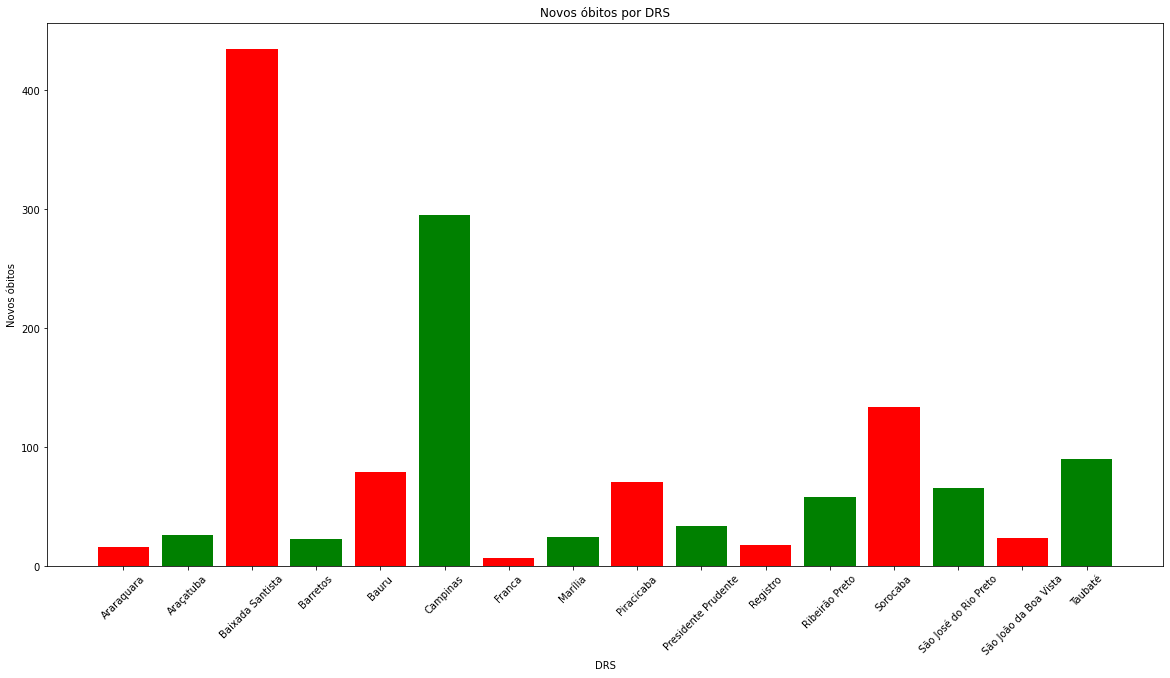

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
df_aux = df2[df2['nome_drs']!='Grande São Paulo'].groupby(['nome_drs'], as_index=False).sum()
ax.bar('nome_drs', 'obitos_novos', data=df_aux, color=['red','green'])

ax.set_xlabel('DRS')
ax.set_ylabel('Novos óbitos')
ax.set_title('Novos óbitos por DRS')

ax.set_xticks(ticks= df_aux['nome_drs'], labels=df_aux['nome_drs'], rotation=45)
plt.show()

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

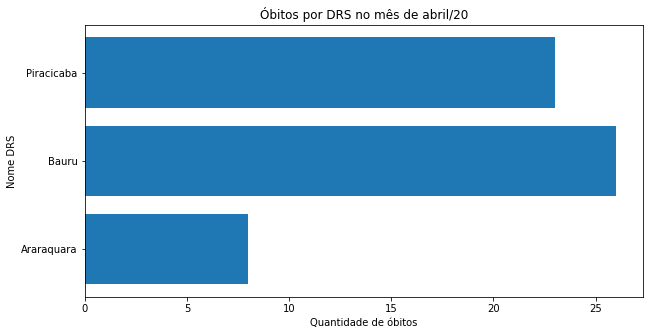

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
df_aux = df2[df2['nome_drs'].isin(['Araraquara', 'Bauru', 'Piracicaba'])
   & (df2.ano_mes=='2020-04')].groupby(['nome_drs'], as_index=False).sum()


ax.barh(y='nome_drs', width='obitos_novos', data=df_aux)

ax.set_title('Óbitos por DRS no mês de abril/20')
ax.set_ylabel('Nome DRS')
ax.set_xlabel('Quantidade de óbitos')
plt.show()

## Exercício 4:

**a)** Utilizando a base de dados da IBM e a biblioteca matplotlib, crie um histograma para as idades dos funcionários, separando por gênero.

[]

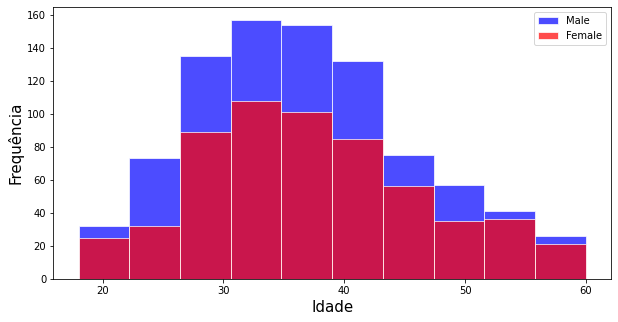

In [91]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(x='Age', bins=10, data=df1[df1['Gender']=='Male'], label='Male', color='blue', alpha=.7, edgecolor='white')
ax.hist(x='Age', bins=10, data=df1[df1['Gender']=='Female'], label='Female', color='red', alpha=.7, edgecolor='white')

ax.legend()
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

ax.plot()

**b)** Faça agora um boxplot das idades, por gênero.

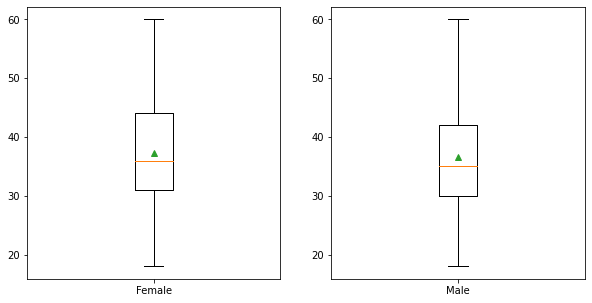

In [101]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(x='Age', data=df1[df1['Gender']=='Female'], showmeans=True)
ax[1].boxplot(x='Age', data=df1[df1['Gender']=='Male'], showmeans=True)

ax[0].set_xticks(ticks=[1], labels=['Female'])
ax[1].set_xticks(ticks=[1], labels=['Male'])

plt.show()